In [1]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

2025-11-13 15:35:19.123191: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-13 15:35:20.287371: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-13 15:35:22.634178: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-13 15:35:23.000519: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


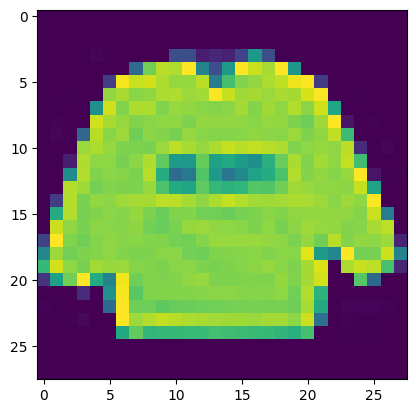

In [2]:
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [3]:
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [4]:
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [5]:
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

reseauNeurone1Convolution = Sequential()

reseauNeurone1Convolution.add(Input(shape=dimentionImage))

reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

reseauNeurone1Convolution.add(Dropout(0.2))

reseauNeurone1Convolution.add(Flatten())

reseauNeurone1Convolution.add(Dense(128, activation='relu'))

reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

In [7]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

In [8]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10


2025-11-13 15:35:29.183002: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.8061 - loss: 0.5578 - val_accuracy: 0.8634 - val_loss: 0.3899
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.8731 - loss: 0.3616 - val_accuracy: 0.8808 - val_loss: 0.3403
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8878 - loss: 0.3182 - val_accuracy: 0.8804 - val_loss: 0.3299
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.8945 - loss: 0.2939 - val_accuracy: 0.8942 - val_loss: 0.3058
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.9033 - loss: 0.2725 - val_accuracy: 0.8992 - val_loss: 0.2866
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9095 - loss: 0.2546 - val_accuracy: 0.9015 - val_loss: 0.2802
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.9131 - loss: 0.2414 - val_accuracy: 0.8997 - val_loss: 0.2785
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - accuracy: 0.9168 - loss: 0.2313 - val_accurac

In [9]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.2402944564819336
Précision: 0.9165999889373779


plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

In [11]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.8259 - loss: 0.4672 - val_accuracy: 0.8440 - val_loss: 0.4186
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - accuracy: 0.8320 - loss: 0.4312

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8320 - loss: 0.4312 - val_accuracy: 0.8409 - val_loss: 0.4213
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 13s 70ms/step - accuracy: 0.8456 - loss: 0.4164 - val_accuracy: 0.8549 - val_loss: 0.3924
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8594 - loss: 0.3926 - val_accuracy: 0.8545 - val_loss: 0.3890
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8541 - loss: 0.3928 - val_accuracy: 0.8643 - val_loss: 0.3727
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8945 - loss: 0.3848 - val_accuracy: 0.8580 - val_loss: 0.3838
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 20s 85ms/step - accuracy: 0.8597 - loss: 0.3785 - val_accuracy: 0.8616 - val_loss: 0.3627
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8398 - loss: 0.3989 - val_accuracy: 0.8643 - val_loss: 0.3647
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 15s 78ms/step - accuracy: 0.8646 - loss: 0.3701 - val_accuracy: 0.86

In [12]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !


In [13]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10


2025-11-13 15:45:35.537814: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 59s 300ms/step - accuracy: 0.7427 - loss: 0.7530 - val_accuracy: 0.1185 - val_loss: 3.7044
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 54s 290ms/step - accuracy: 0.8434 - loss: 0.4381 - val_accuracy: 0.5406 - val_loss: 1.8336
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 293ms/step - accuracy: 0.8672 - loss: 0.3729 - val_accuracy: 0.8183 - val_loss: 0.5146
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 55s 292ms/step - accuracy: 0.8803 - loss: 0.3344 - val_accuracy: 0.8953 - val_loss: 0.2867
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 55s 294ms/step - accuracy: 0.8899 - loss: 0.3091 - val_accuracy: 0.8980 - val_loss: 0.2756
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 85s 310ms/step - accuracy: 0.8978 - loss: 0.2884 - val_accuracy: 0.9023 - val_loss: 0.2609
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 80s 297ms/step - accuracy: 0.9012 - loss: 0.2719 - val_accuracy: 0.9058 - val_loss: 0.2614
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 305ms/step - accuracy: 0.9076 - loss: 0.2603 - val

In [15]:
evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.2201380878686905
Précision: 0.9243000149726868


In [ ]:
historique_apprentissage = reseauNeurones4Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 55s 290ms/step - accuracy: 0.8536 - loss: 0.4037 - val_accuracy: 0.8572 - val_loss: 0.3935
Epoch 2/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.8359 - loss: 0.4284 - val_accuracy: 0.8629 - val_loss: 0.3749
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 283ms/step - accuracy: 0.8714 - loss: 0.3575 - val_accuracy: 0.8746 - val_loss: 0.3494
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.8516 - loss: 0.3943 - val_accuracy: 0.8772 - val_loss: 0.3406
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 81s 295ms/step - accuracy: 0.8756 - loss: 0.3456 - val_accuracy: 0.8681 - val_loss: 0.3516
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8320 - loss: 0.4554 - val_accuracy: 0.8763 - val_loss: 0.3308
Epoch 7/50
